In [28]:
#Importing Dependicies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [29]:
#Loading the dataset into pandas dataframe

df=pd.read_csv("E:\\Datasets\\Data.csv")

In [30]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [31]:
#Label Encoding to transform our categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
country_labels=label_encoder_x.fit_transform(df.Country)
label_encoder_y=LabelEncoder()
df["Country"]=country_labels
Purchased_labels=label_encoder_y.fit_transform(df.Purchased)
df["Purchased"]=Purchased_labels

In [32]:
#filling missing values by taking it's mean

df["Age"].fillna(df['Age'].mean(),inplace=True)
df["Salary"].fillna(df['Salary'].mean(),inplace=True)
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [62]:
#Splitting the data into features and target variables

X=df.iloc[:,1:3].values
Y=df.iloc[:,-1].values
print(X.shape,Y.shape)

(10, 2) (10,)


In [63]:
print(X)

[[4.40000000e+01 7.20000000e+04]
 [2.70000000e+01 4.80000000e+04]
 [3.00000000e+01 5.40000000e+04]
 [3.80000000e+01 6.10000000e+04]
 [4.00000000e+01 6.37777778e+04]
 [3.50000000e+01 5.80000000e+04]
 [3.87777778e+01 5.20000000e+04]
 [4.80000000e+01 7.90000000e+04]
 [5.00000000e+01 8.30000000e+04]
 [3.70000000e+01 6.70000000e+04]]


In [64]:
print("feature variables are :",X)
print("target variables are :",Y)

feature variables are : [[4.40000000e+01 7.20000000e+04]
 [2.70000000e+01 4.80000000e+04]
 [3.00000000e+01 5.40000000e+04]
 [3.80000000e+01 6.10000000e+04]
 [4.00000000e+01 6.37777778e+04]
 [3.50000000e+01 5.80000000e+04]
 [3.87777778e+01 5.20000000e+04]
 [4.80000000e+01 7.90000000e+04]
 [5.00000000e+01 8.30000000e+04]
 [3.70000000e+01 6.70000000e+04]]
target variables are : [0 1 0 0 1 1 0 1 0 1]


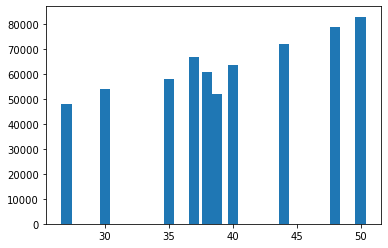

In [65]:
#Understanding the linear relationship between the age and salary

x=df["Age"]
y=df["Salary"]
 
plt.bar(x,y,linewidth=4)
plt.show()

In [66]:
#Splitting the dataset into the training data and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8, 2) (8,) (2, 2) (2,)


In [67]:
#Feature scalling

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)
print(X_train,X_test)

[[ 0.26306757  0.12381479]
 [-0.25350148  0.46175632]
 [-1.97539832 -1.53093341]
 [ 0.05261351 -1.11141978]
 [ 1.64058505  1.7202972 ]
 [-0.0813118  -0.16751412]
 [ 0.95182631  0.98614835]
 [-0.59788085 -0.48214934]] [[-1.45882927 -0.90166297]
 [ 1.98496442  2.13981082]]


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model=LinearRegression()
model.fit(X_train,Y_train)
test_data_prediction=model.predict(X_test)
 
print(test_data_prediction)


[0.99557345 0.62716164]


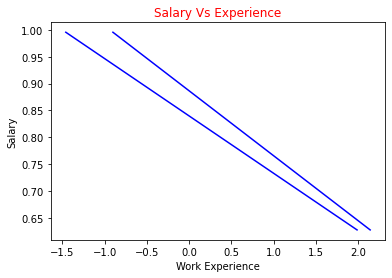

In [74]:
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary Vs Experience",color="red")
plt.show()